# Logistic Regression with Scikit-Learn

This notebook demonstrates binary classification using the Logistic Regression algorithm from scikit-learn on the Pima Indians Diabetes dataset.

## 1. Introduction
We will build, train, and evaluate a Logistic Regression model to predict diabetes onset.

## 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## 3. Load and Prepare Data

In [ ]:
X, y = fetch_openml('diabetes', version=1, as_frame=True, return_X_y=True)
# Map the string labels to integers
y = y.map({"tested_negative": 0, "tested_positive": 1})
# y = y.astype(int)  # ensure integer labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Train Logistic Regression Model

In [9]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## 5. Evaluate Model

In [10]:
y_pred = model.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.52      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231


Confusion Matrix:
[[130  20]
 [ 39  42]]


## 6. ROC Curve & AUC

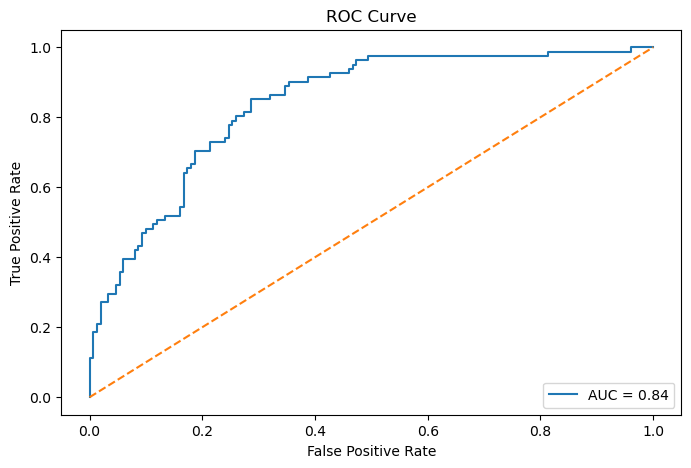

In [11]:
y_score = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## 7. Conclusion
The Logistic Regression model provides a solid baseline for diabetes prediction.  Evaluate AUC and consider regularization or feature selection to improve performance.